## Тестовое задание
### Необходимо построить подневный прогноз revenue на 20 дней вперед. В файле data_set.csv - признаки, в target.csv - целевая переменная

#### Обучим случайные лес 
#### Поэскперементируем с разным количеством деревьев
#### Сравним метрики mse и mae
#### Оценим с помощью коэффициента детерминации


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
plt.rc('font', family='Verdana')
import datetime

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

### загружаем данные

In [2]:
data = pd.read_csv('target.csv')
data['date'] = pd.to_datetime(data.date)
data=data.set_index("date")
print("данные data:\n{}".format(data.head()))

data_set = pd.read_csv('data_set.csv')
data_set['date'] = pd.to_datetime(data_set.date)
data_set=data_set.set_index("date")
print("данные data_set:\n{}".format(data_set.head()))

данные data:
              revenue
date                 
2014-05-31  237912.75
2014-06-01  237447.25
2014-06-02  237791.22
2014-06-03  236861.37
2014-06-04  235253.34
данные data_set:
             feature1  feature2  feature3  feature4
date                                               
2014-05-31  13.841466  5.552960  9.184875  7.377134
2014-06-01  14.164436  5.488938  9.111136  7.413367
2014-06-02  13.993646  5.556828  8.912889  7.104144
2014-06-03  14.126220  5.416100  9.060696  7.136483
2014-06-04  15.101483  4.875197  8.592457  7.166266


### отобразим целевую функцию

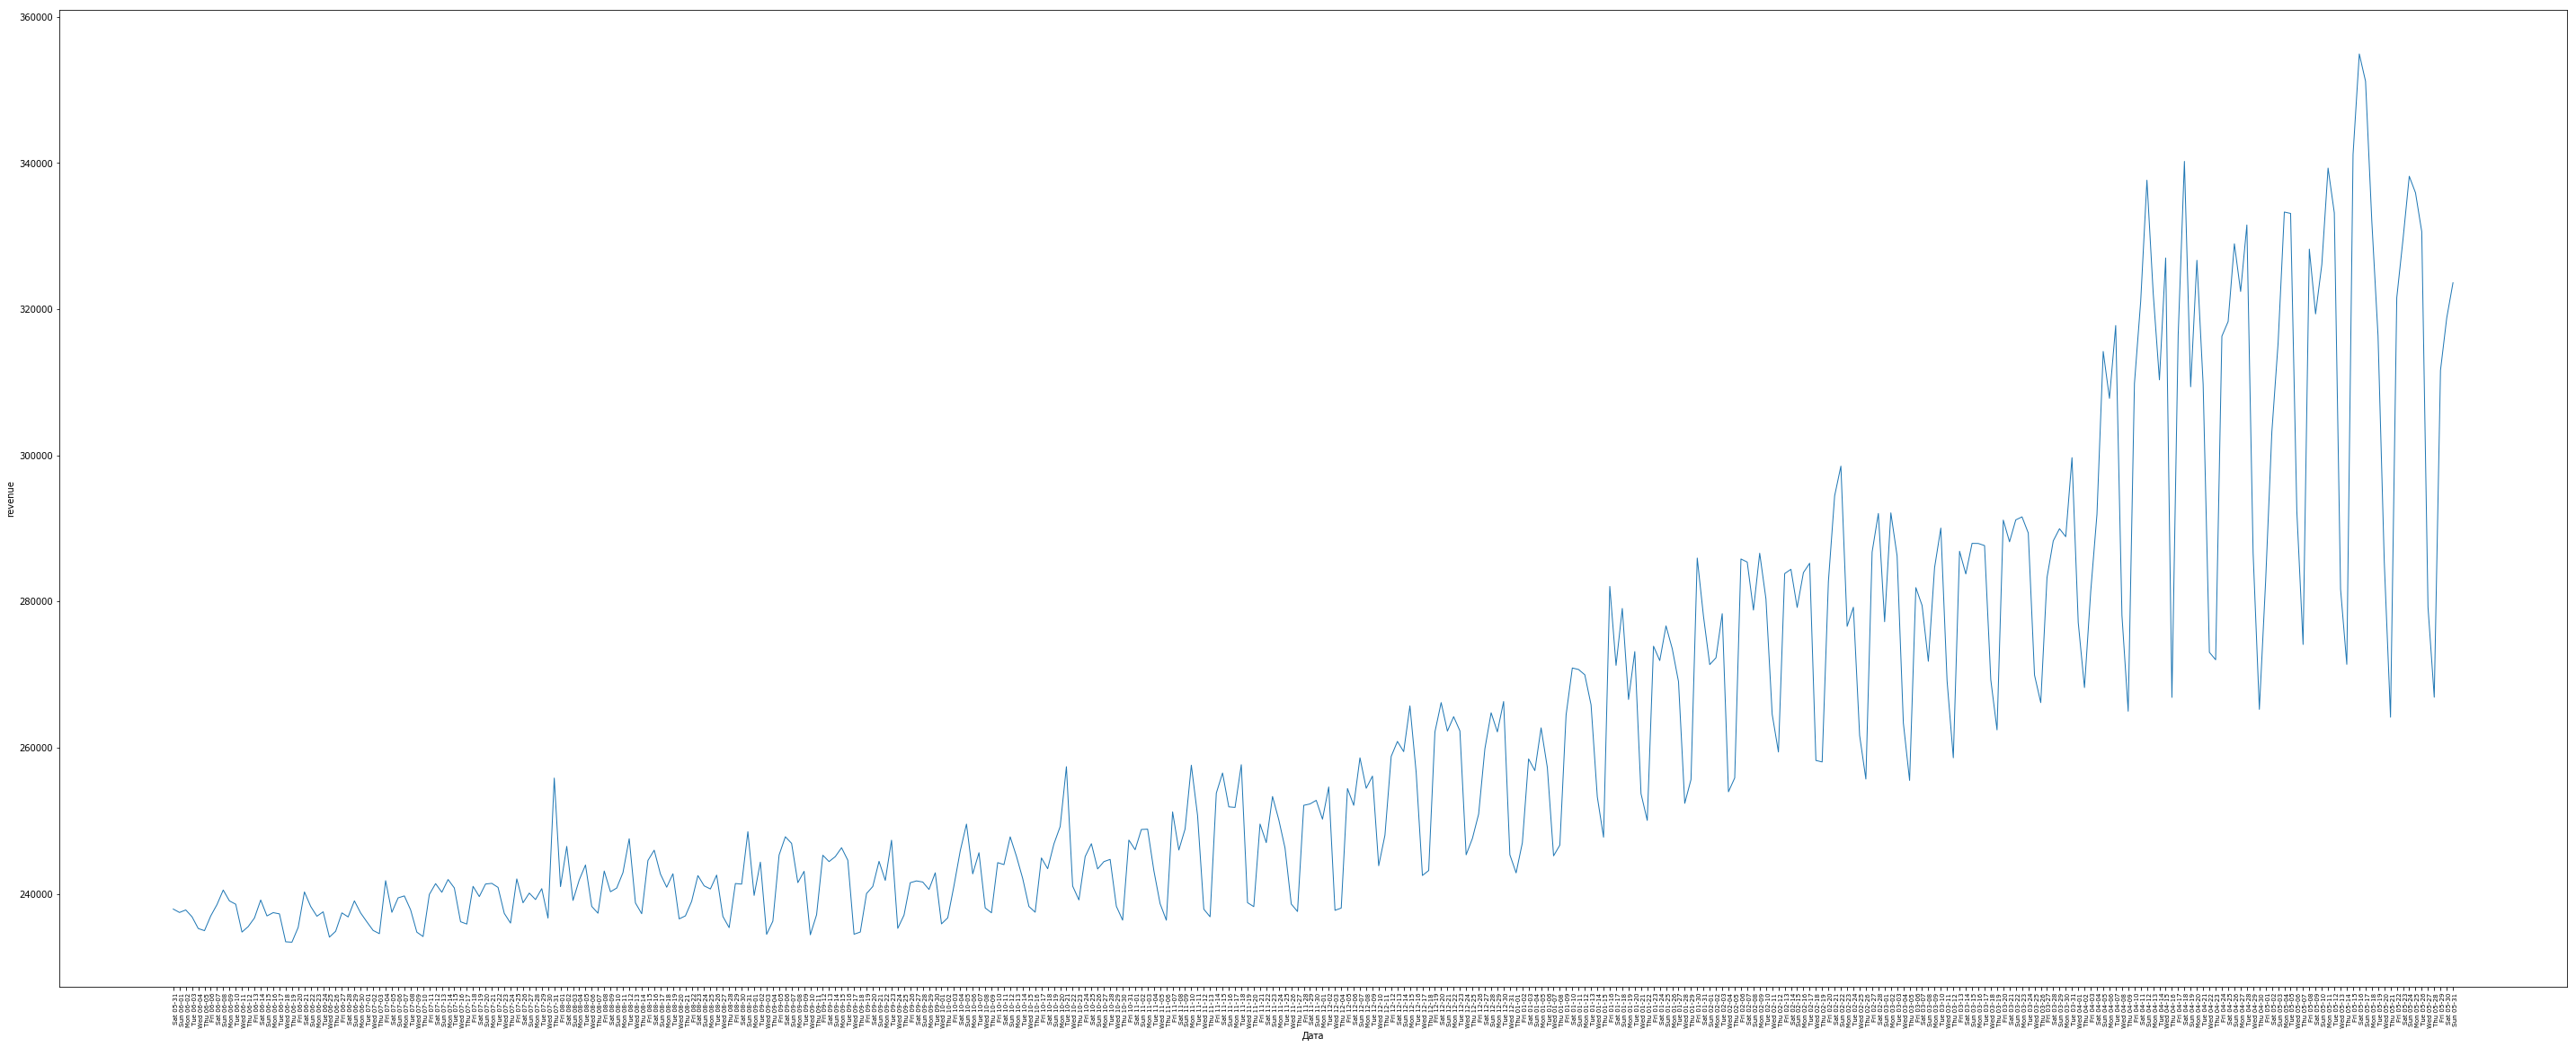

In [3]:
plt.figure(figsize=(50, 20))
xticks = pd.date_range(start=data.index.min(), end=data.index.max(),
freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), fontsize=7, rotation=90, ha="left")
plt.plot(data, linewidth=1)
plt.xlabel("Дата")
plt.ylabel("revenue")
plt.show()

### отобразим признаки

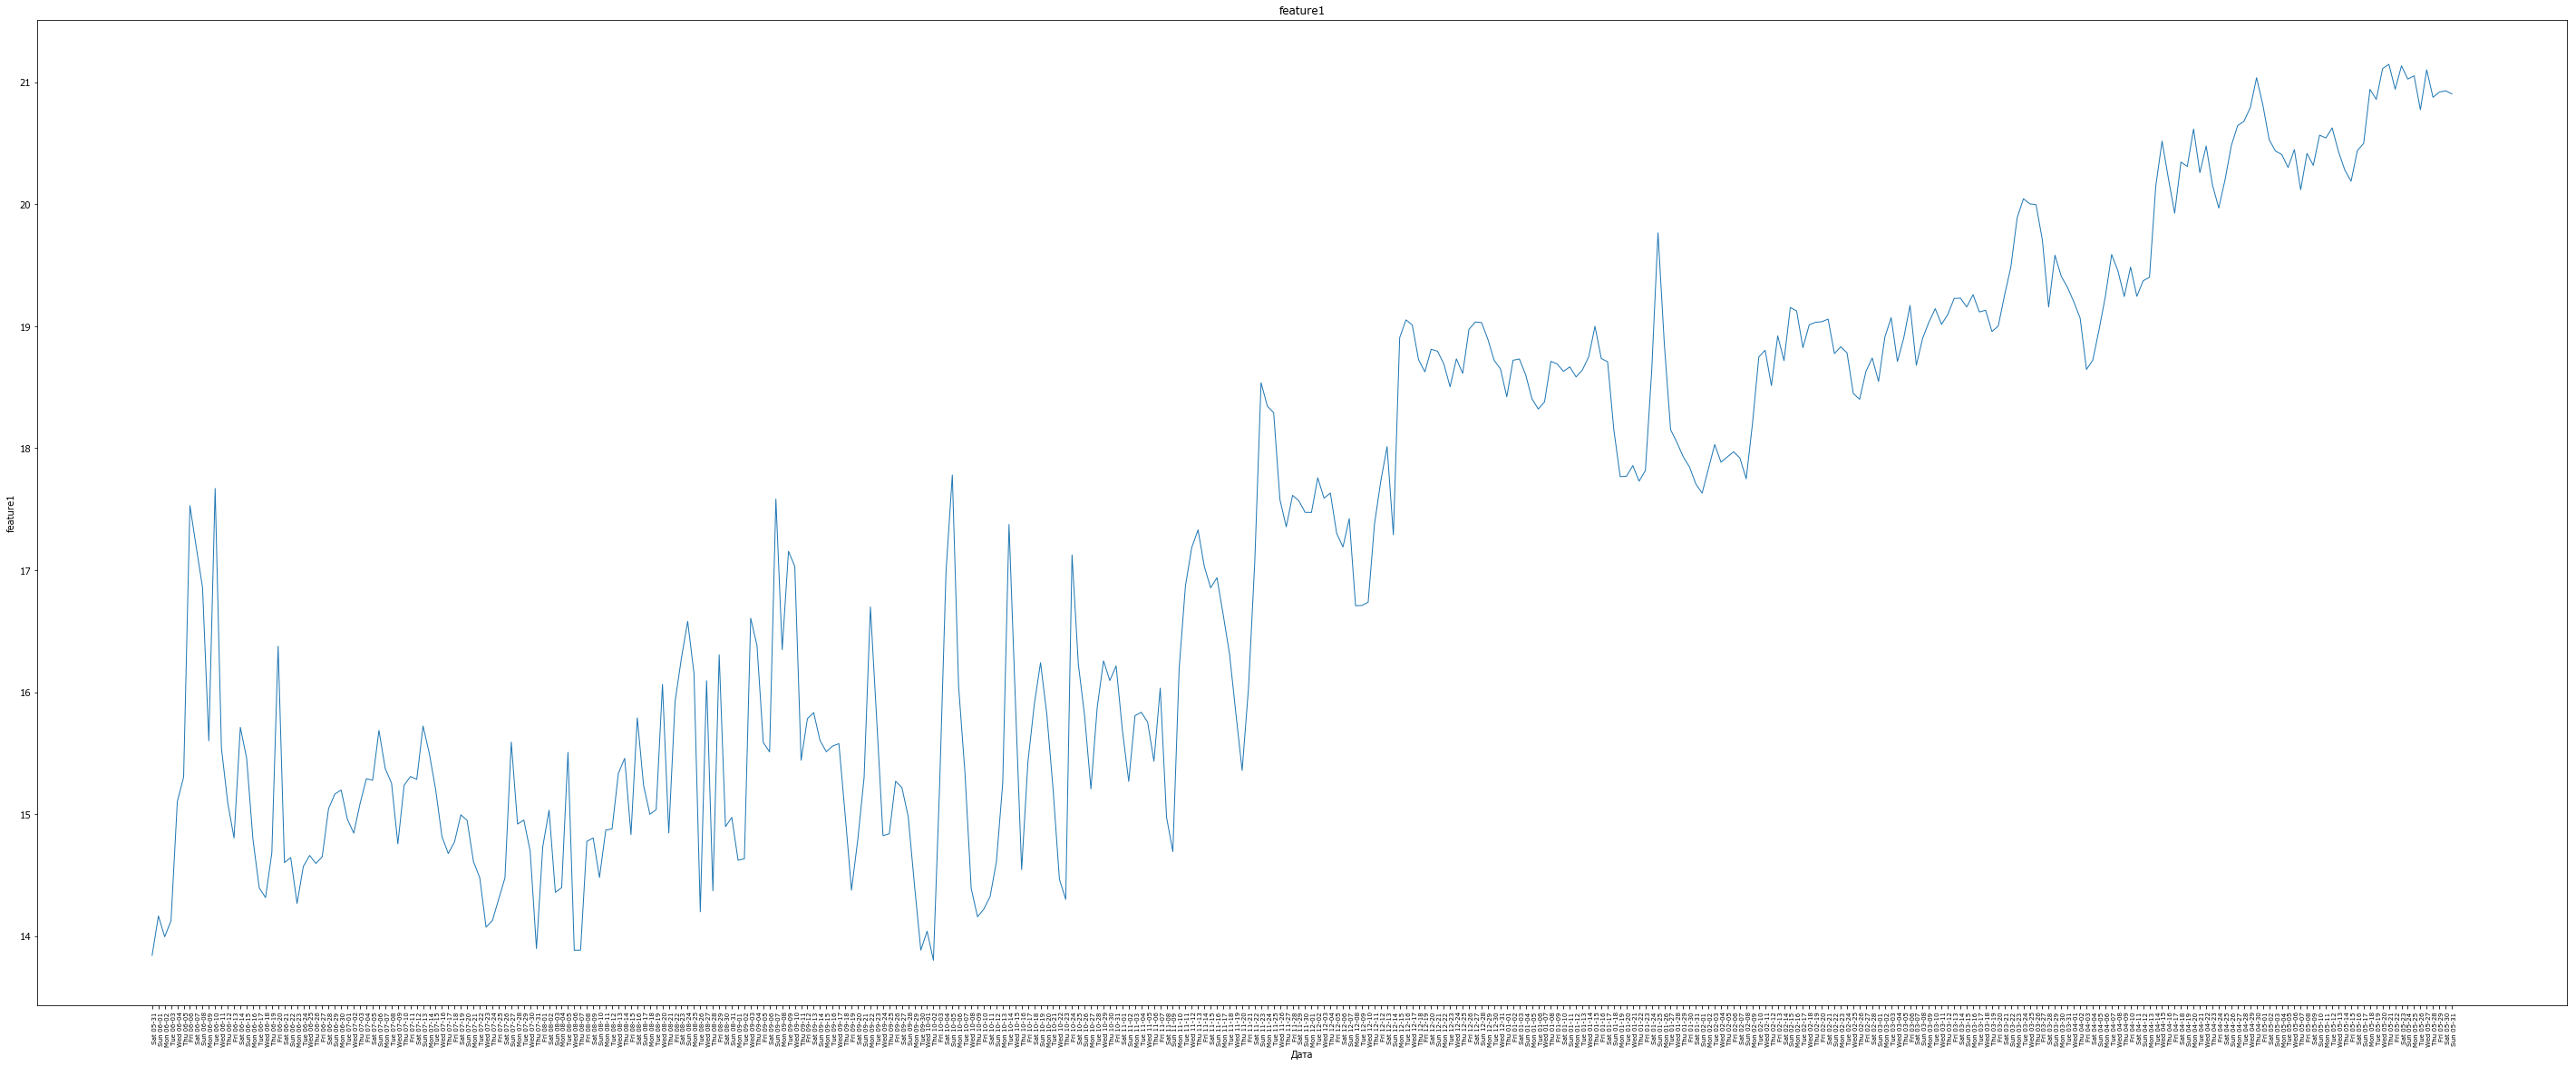

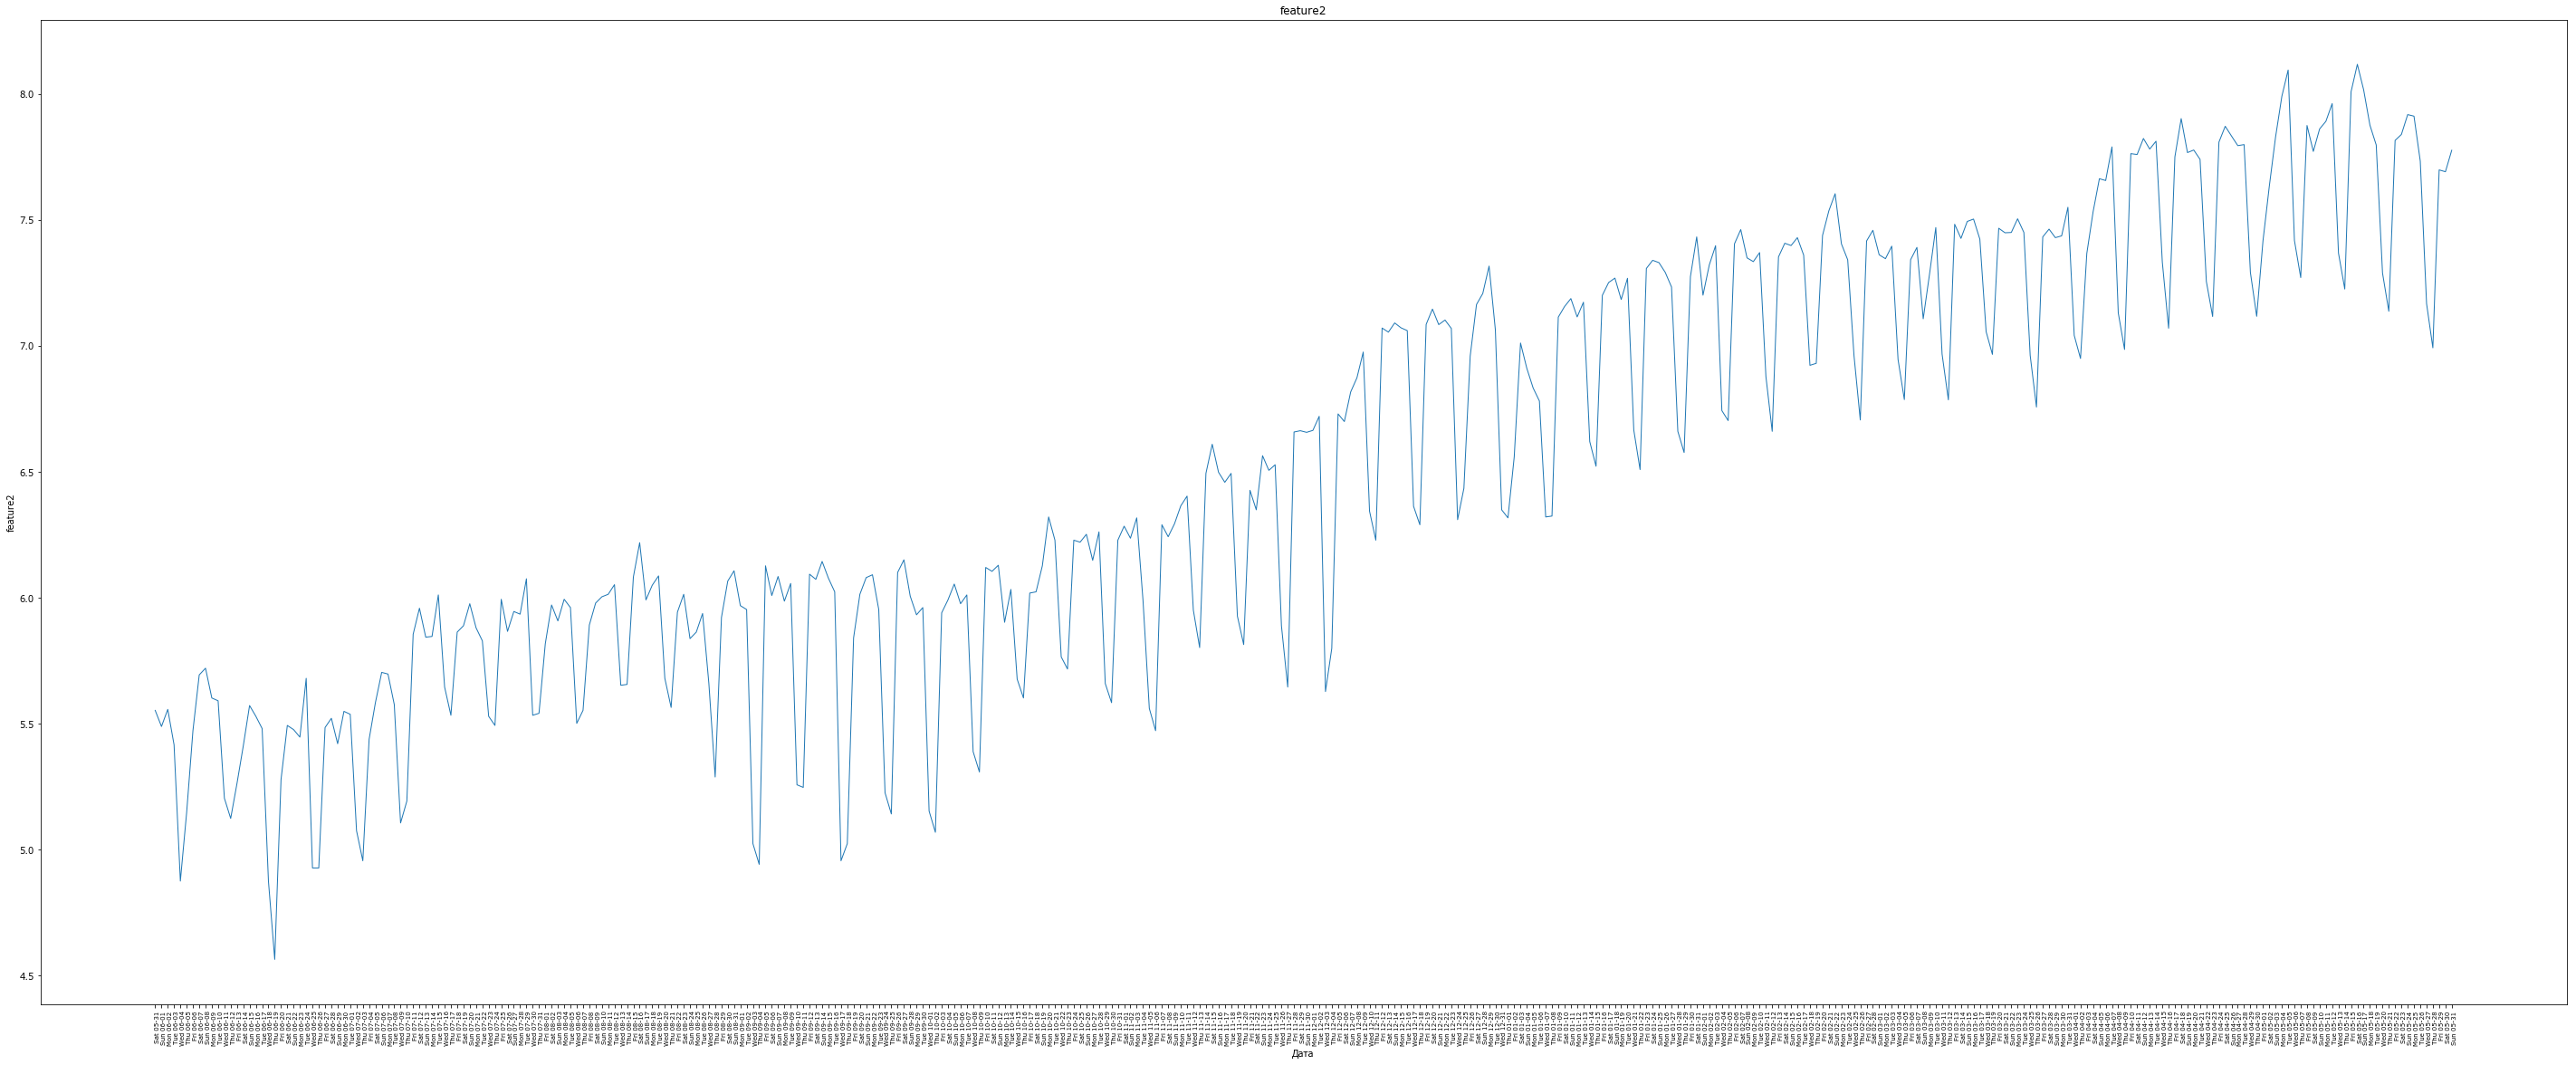

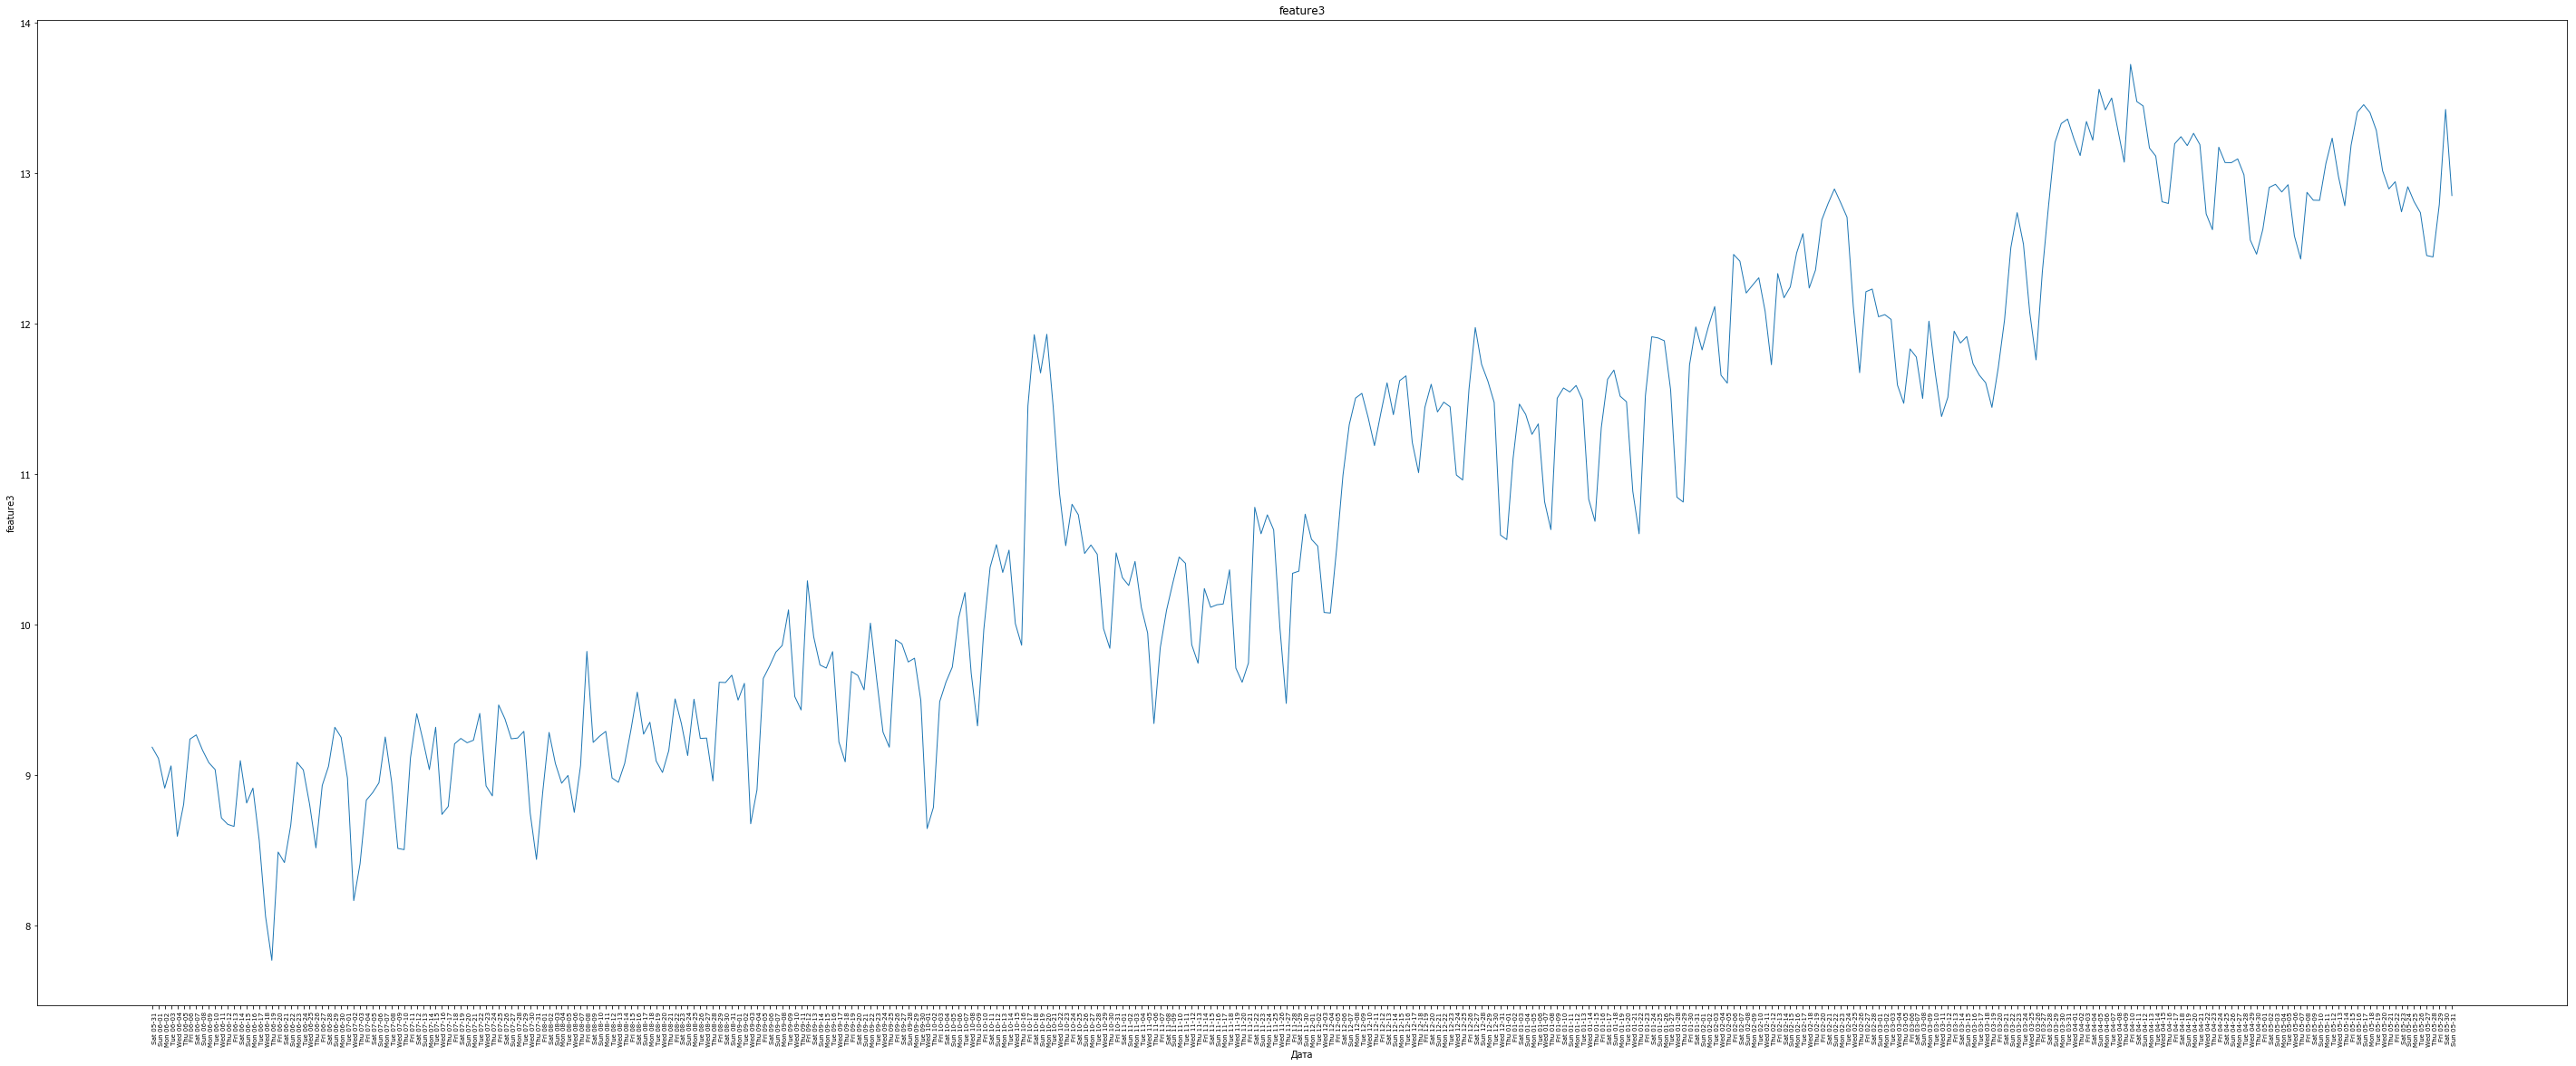

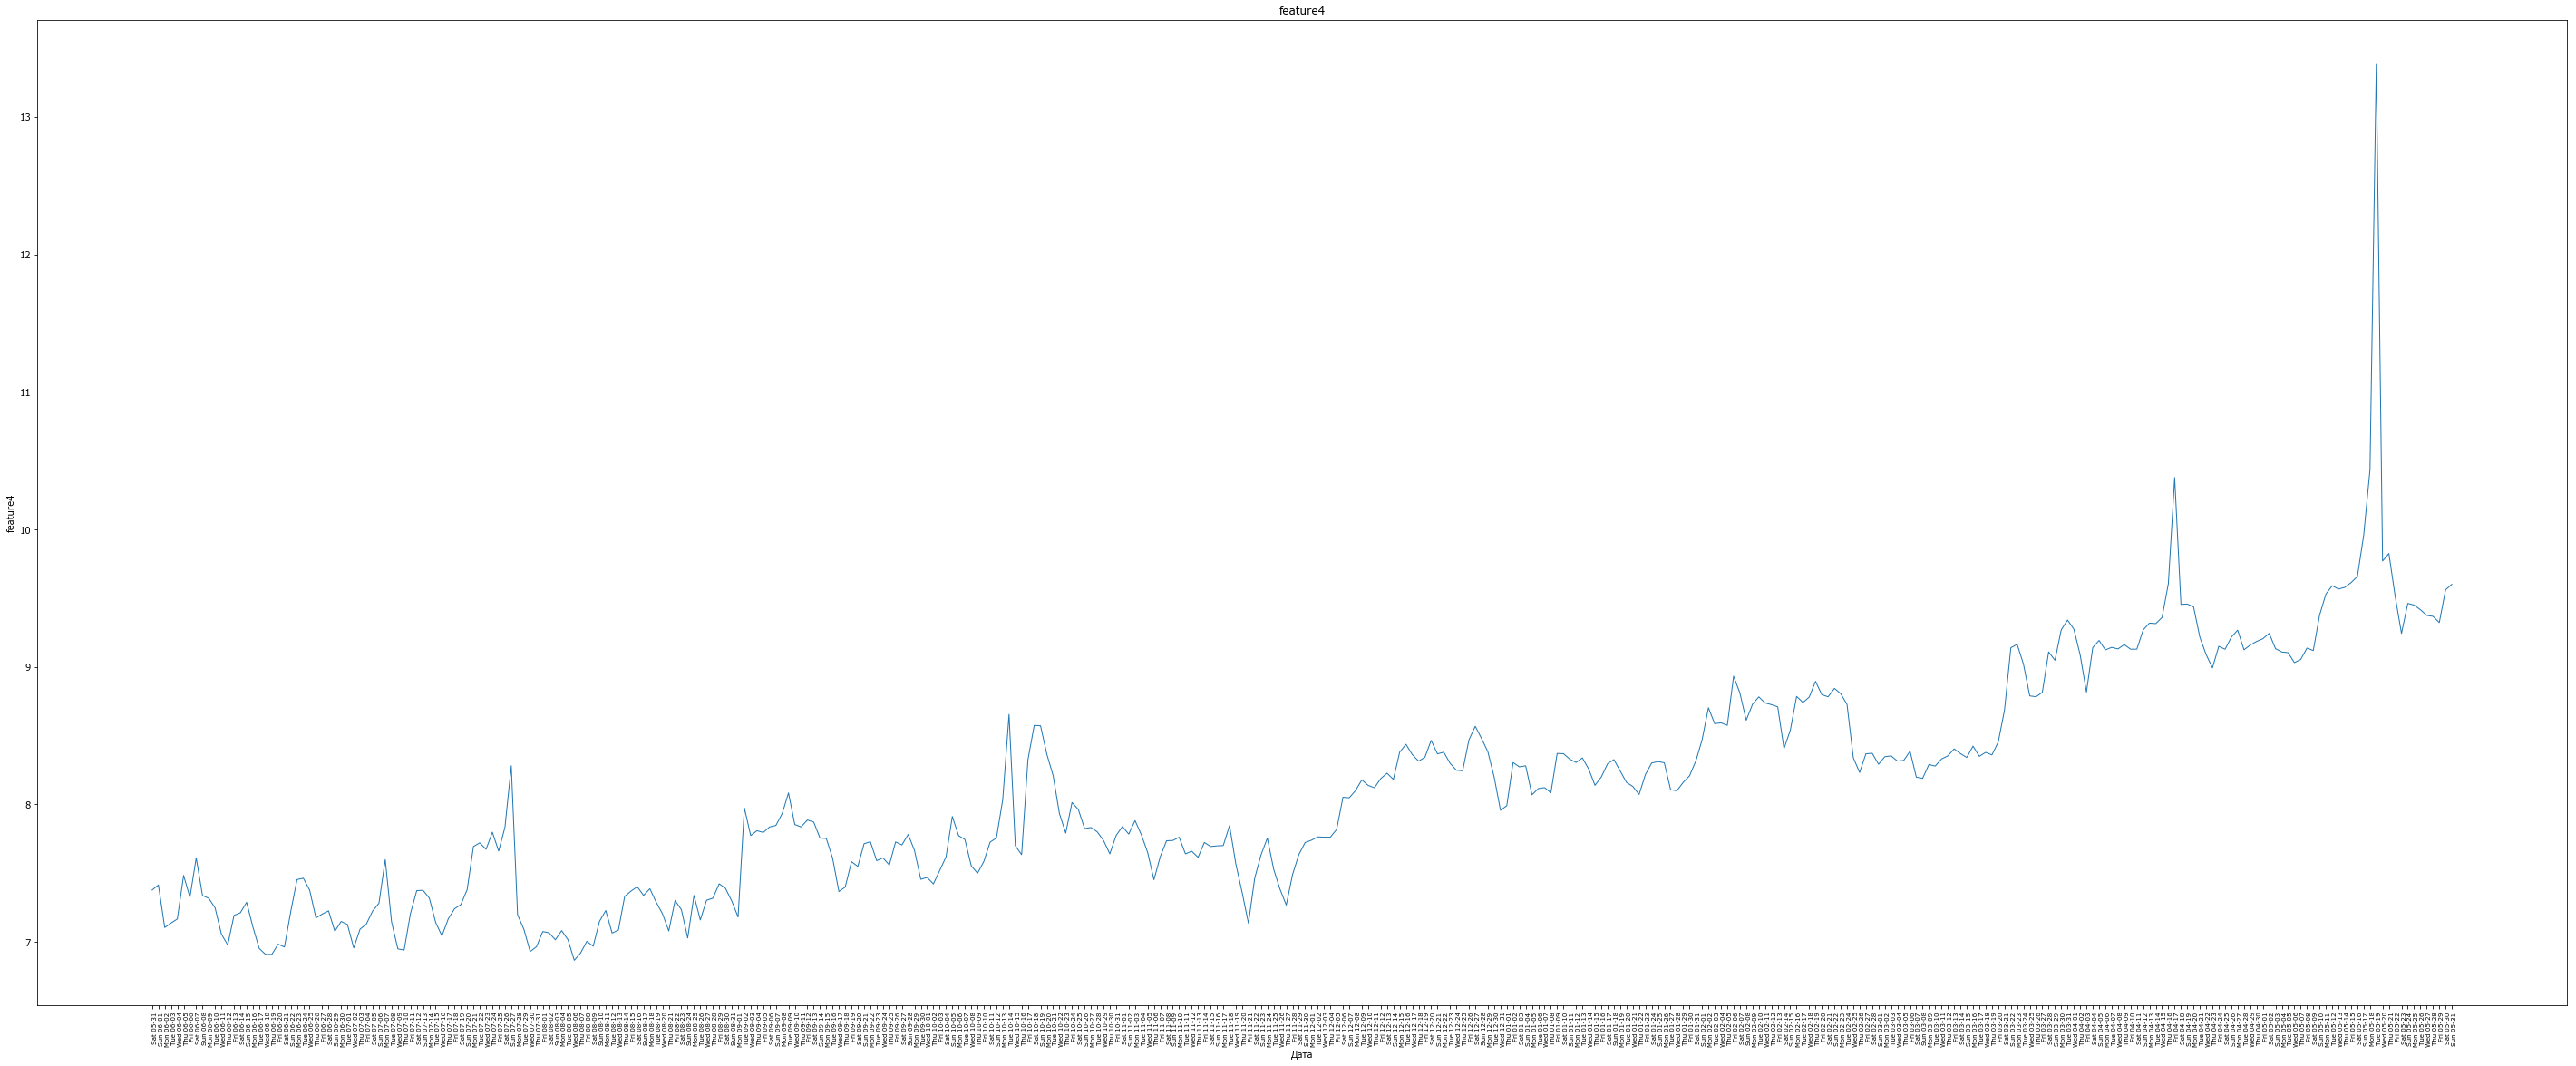

In [4]:
for feature in data_set:
    plt.figure(figsize=(50, 20))
    plt.title(feature) 
    xticks = pd.date_range(start=data_set[feature].index.min(), end=data_set[feature].index.max(), freq='D')
    plt.xticks(xticks, xticks.strftime("%a %m-%d"), fontsize=7, rotation=90, ha="left")
    plt.plot(data_set[feature], linewidth=1)
    plt.xlabel("Дата")
    plt.ylabel(feature)
    plt.show()

### создадим модель

In [5]:
y = data.values
X = data.index
n_train = len(y)-20

In [6]:
def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train.ravel())
    print("R^2 для тестового набора: {:.4f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(50, 20))
    plt.xticks(range(0, len(X), 1), xticks.strftime("%a %m-%d"), fontsize=7, rotation=90,ha="left")
    plt.plot(range(n_train), y_train, label="обуч")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="тест")
    plt.plot(range(n_train), y_pred_train, '--', label="прогноз обуч")
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',label="прогноз тест")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Дата")
    plt.ylabel("Частота проката")
    plt.show()
    return (regressor.score(X_test, y_test))


R^2 для тестового набора: 0.8072


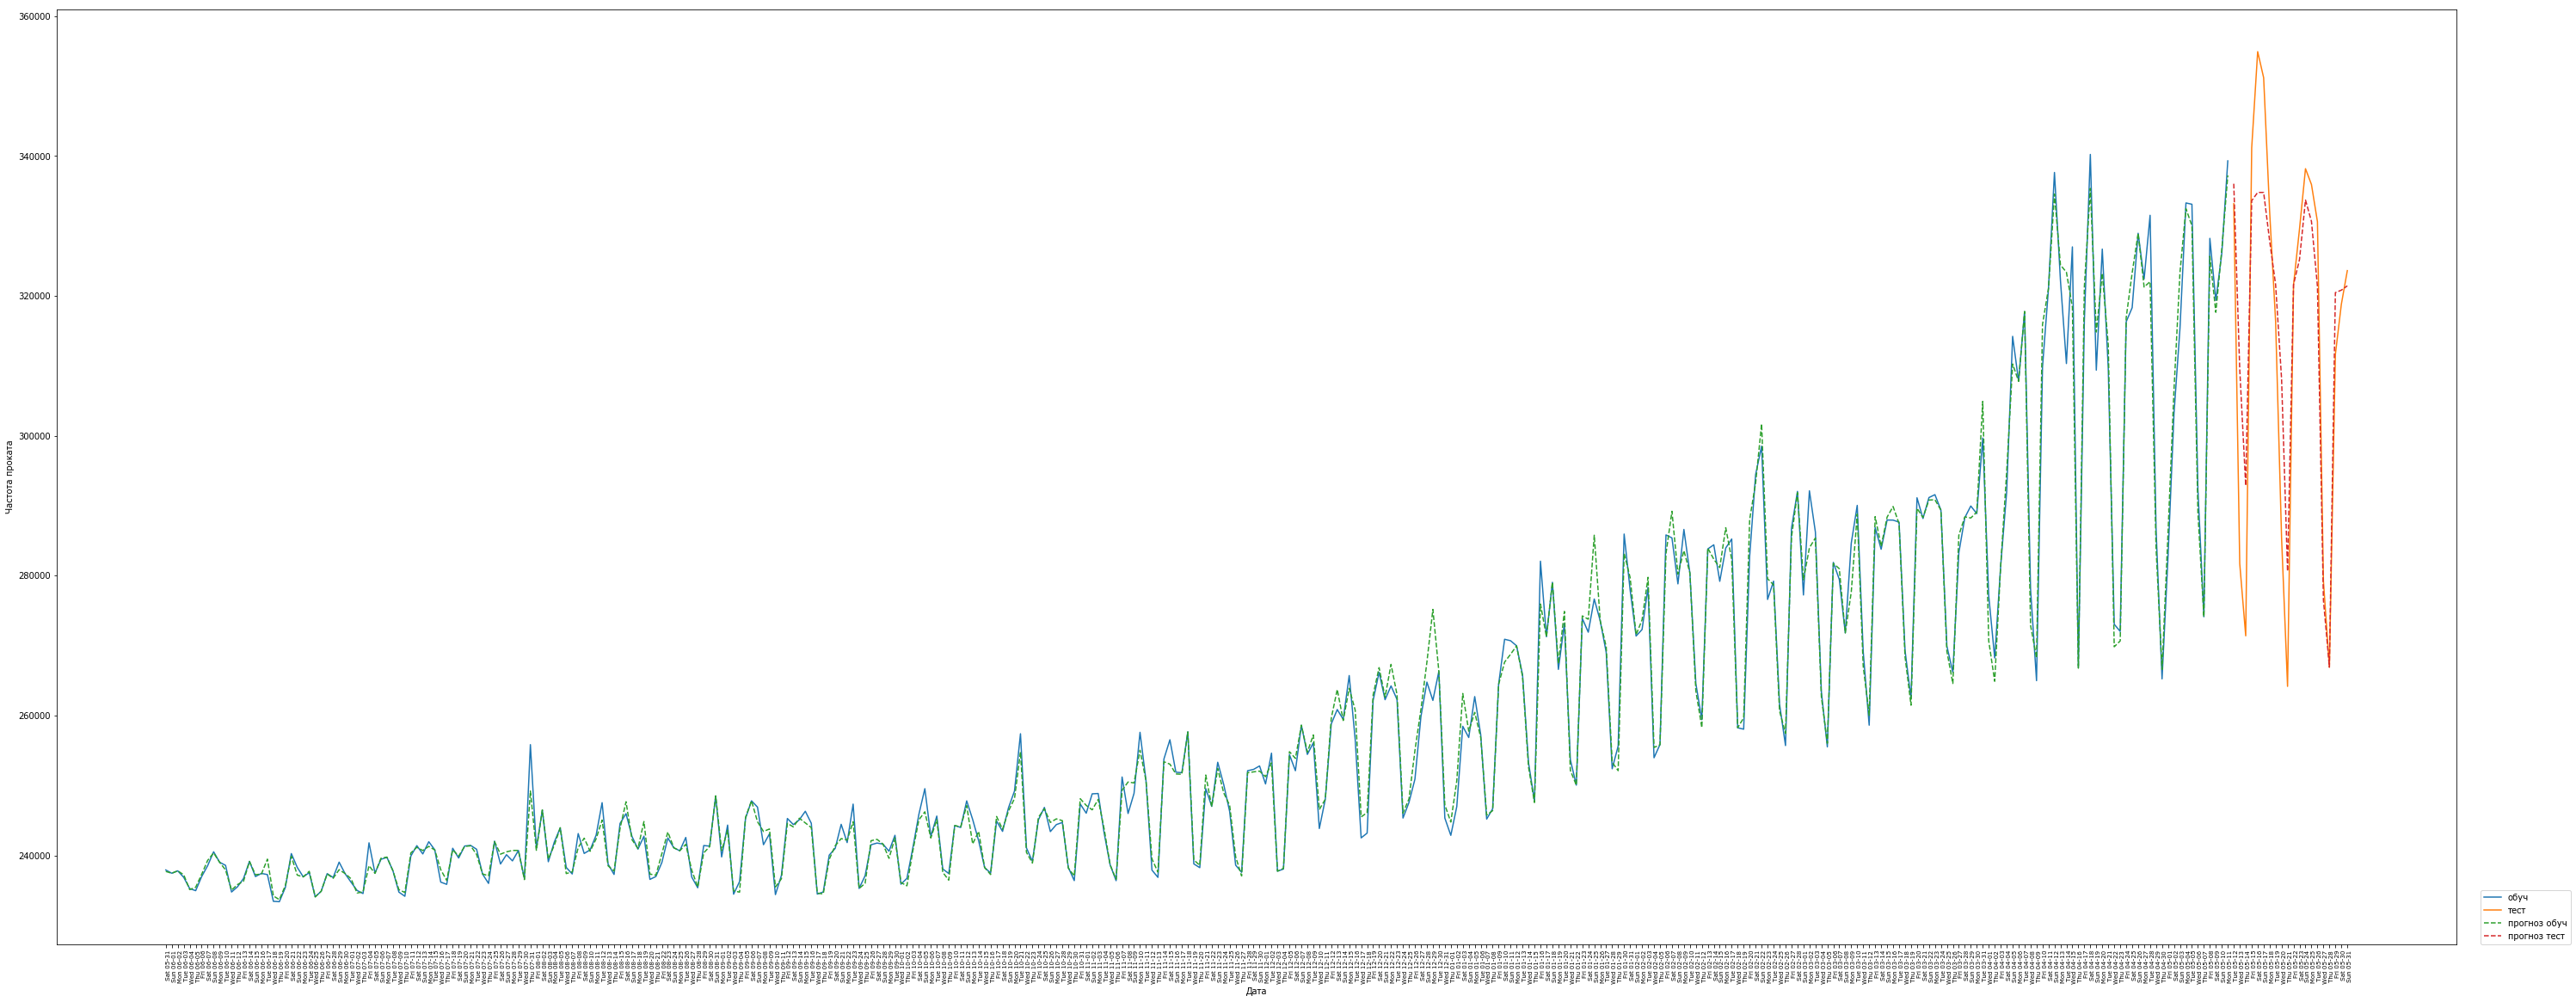

In [7]:
regressor = RandomForestRegressor(n_estimators=5, criterion = 'mse', random_state=0)
score = eval_on_features(data_set, y, regressor)

### попробуем увеличить количество деревьев

In [8]:
def train(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train.ravel())
    score = regressor.score(X_test, y_test)
    print("R^2 для тестового набора: {:.4f}".format(score))
    return score

estimators = [5,10,20,50,75,100]
scores = []
for est in estimators:
    print ('Количество деревьев:{:3d}'.format(est))
    regressor = RandomForestRegressor(n_estimators=est, criterion = 'mse', random_state=0)
    score = train(data_set, y, regressor)
    scores.append(score)
print("R^2 max: {:.4f}".format(max(scores)))
    

Количество деревьев:  5
R^2 для тестового набора: 0.8072
Количество деревьев: 10
R^2 для тестового набора: 0.7790
Количество деревьев: 20
R^2 для тестового набора: 0.8004
Количество деревьев: 50
R^2 для тестового набора: 0.8160
Количество деревьев: 75
R^2 для тестового набора: 0.8281
Количество деревьев:100
R^2 для тестового набора: 0.8405
R^2 max: 0.8405


#### изменим метрику на mae (если у вас возникают проблемы с памятью, обновите sklern до версии 0.19)

In [9]:
estimators = [5,10,20,50,75,100]
scores = []
for est in estimators:
    print ('Количество деревьев:{:3d}'.format(est))
    regressor = RandomForestRegressor(n_estimators=est, criterion = 'mae', random_state=0)
    score = train(data_set, y, regressor)
    scores.append(score)
print("R^2 max: {:.4f}".format(max(scores)))

Количество деревьев:  5
R^2 для тестового набора: 0.8018
Количество деревьев: 10
R^2 для тестового набора: 0.8309
Количество деревьев: 20
R^2 для тестового набора: 0.8663
Количество деревьев: 50
R^2 для тестового набора: 0.8806
Количество деревьев: 75
R^2 для тестового набора: 0.8820
Количество деревьев:100
R^2 для тестового набора: 0.8774
R^2 max: 0.8820



#### можно предположить, что значения revenue зависят от дня недели
#### отобразим значения за месяц

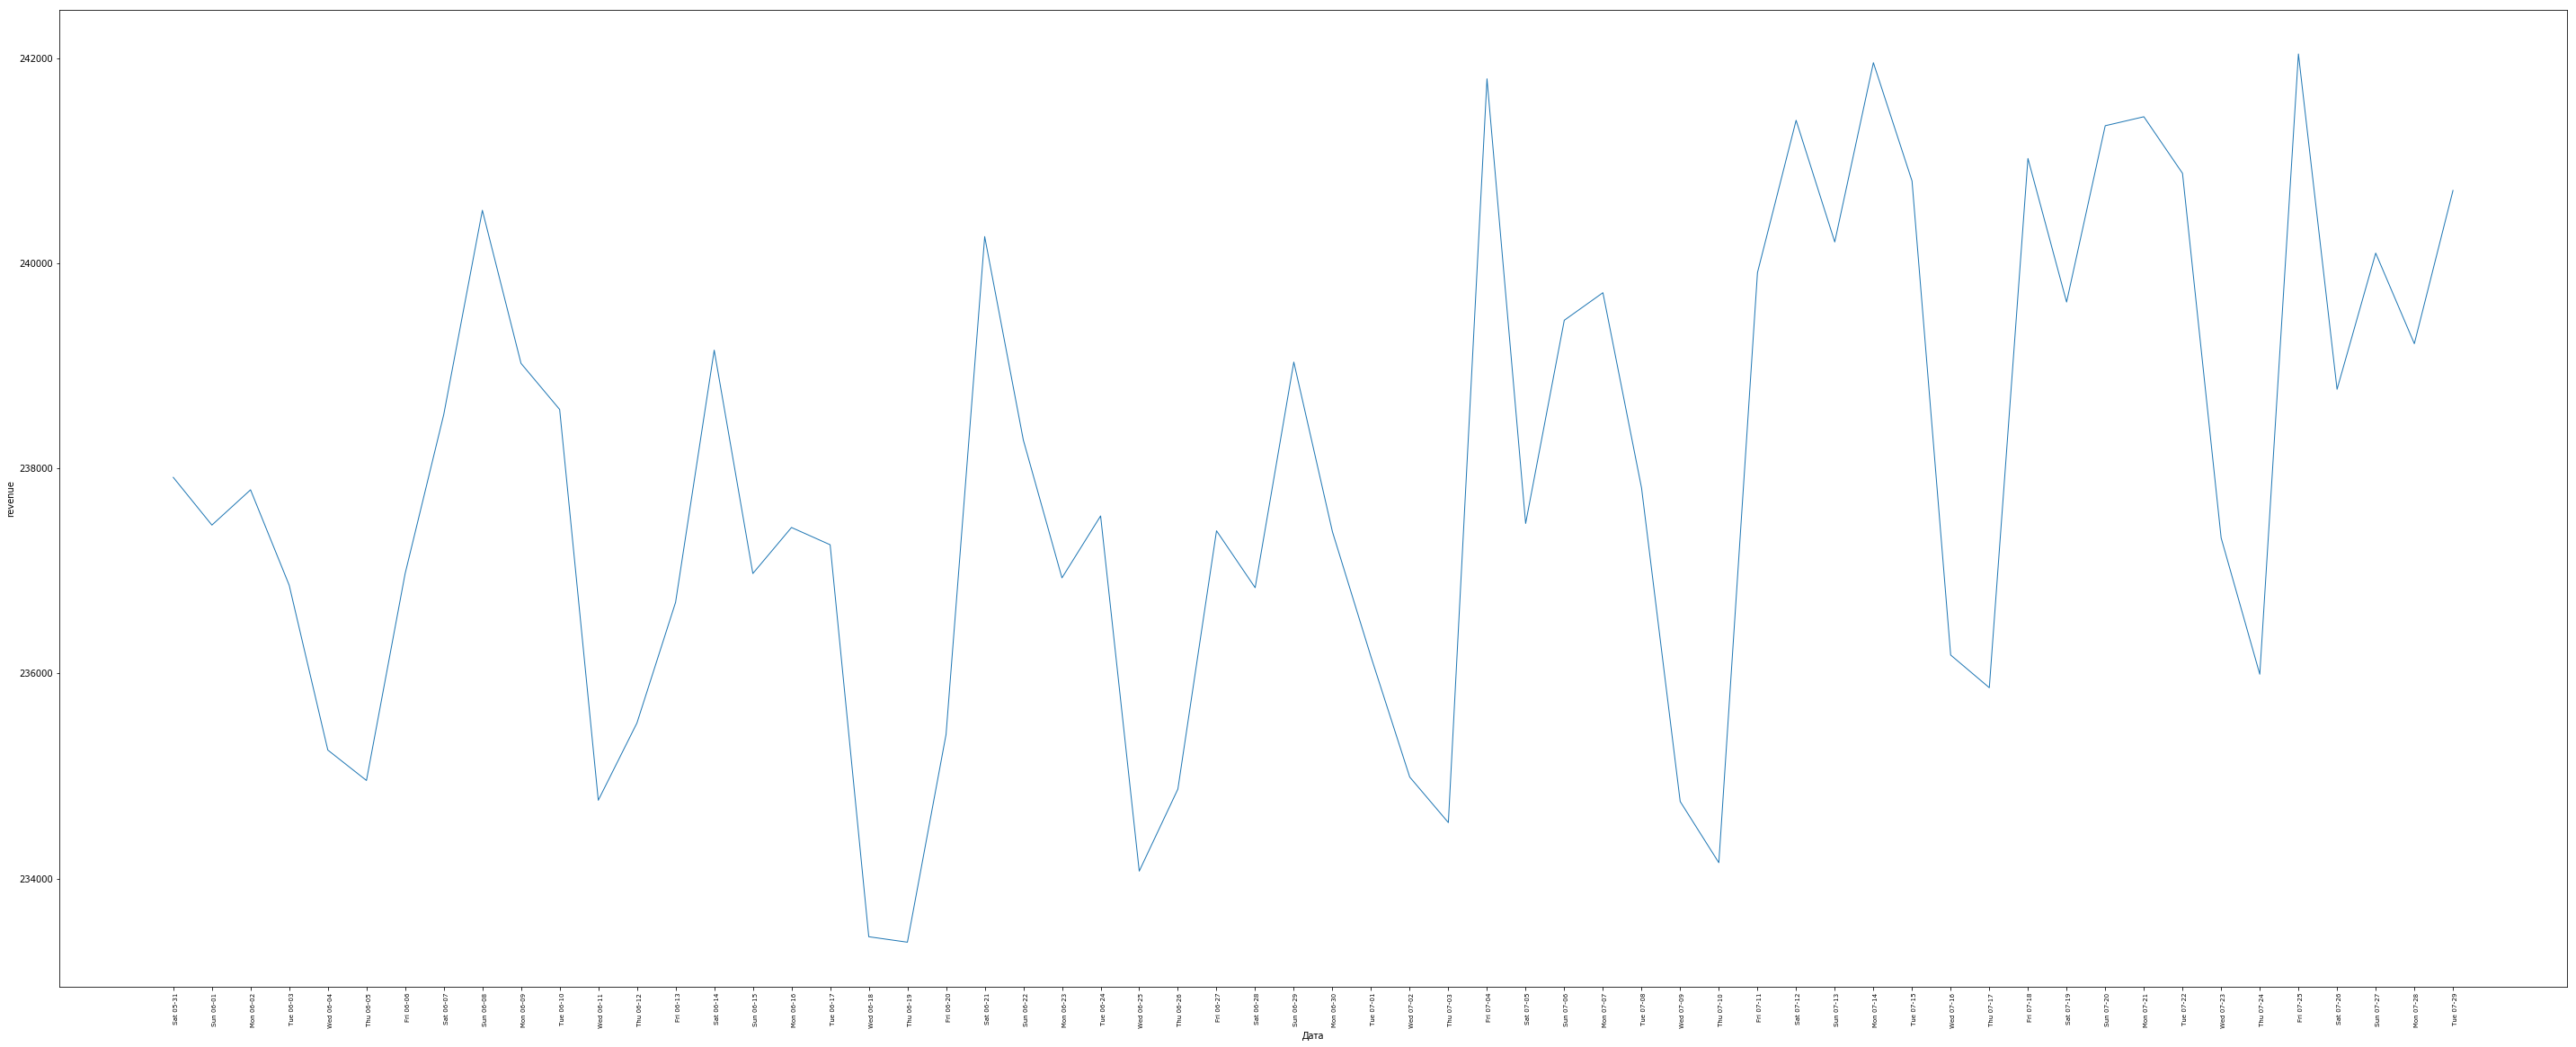

In [10]:
month = data[0:60]

plt.figure(figsize=(50, 20))
xticks = pd.date_range(start=month.index.min(), end=month.index.max(),
freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), fontsize=7, rotation=90, ha="left")
plt.plot(month, linewidth=1)
plt.xlabel("Дата")
plt.ylabel("revenue")
plt.show()

#### на графике можно заметить недельные скачки
#### добавим дни недели

In [11]:
X_day_week = np.hstack([data.index.dayofweek.reshape(-1, 1),data_set])

estimators = [5,10,20,50,75,100]
scores = []
for est in estimators:
    print ('Количество деревьев:{:3d}'.format(est))
    regressor = RandomForestRegressor(n_estimators=est, criterion = 'mae', random_state=0)
    score = train(X_day_week, y, regressor)
    scores.append(score)
print("R^2 max: {:.4f}".format(max(scores)))

Количество деревьев:  5
R^2 для тестового набора: 0.7744
Количество деревьев: 10
R^2 для тестового набора: 0.8329
Количество деревьев: 20
R^2 для тестового набора: 0.8699
Количество деревьев: 50
R^2 для тестового набора: 0.8784
Количество деревьев: 75
R^2 для тестового набора: 0.8853
Количество деревьев:100
R^2 для тестового набора: 0.8816
R^2 max: 0.8853


#### дни недели сильно не повлияли на результат
#### отобразим лучшую модель

R^2 для тестового набора: 0.8853


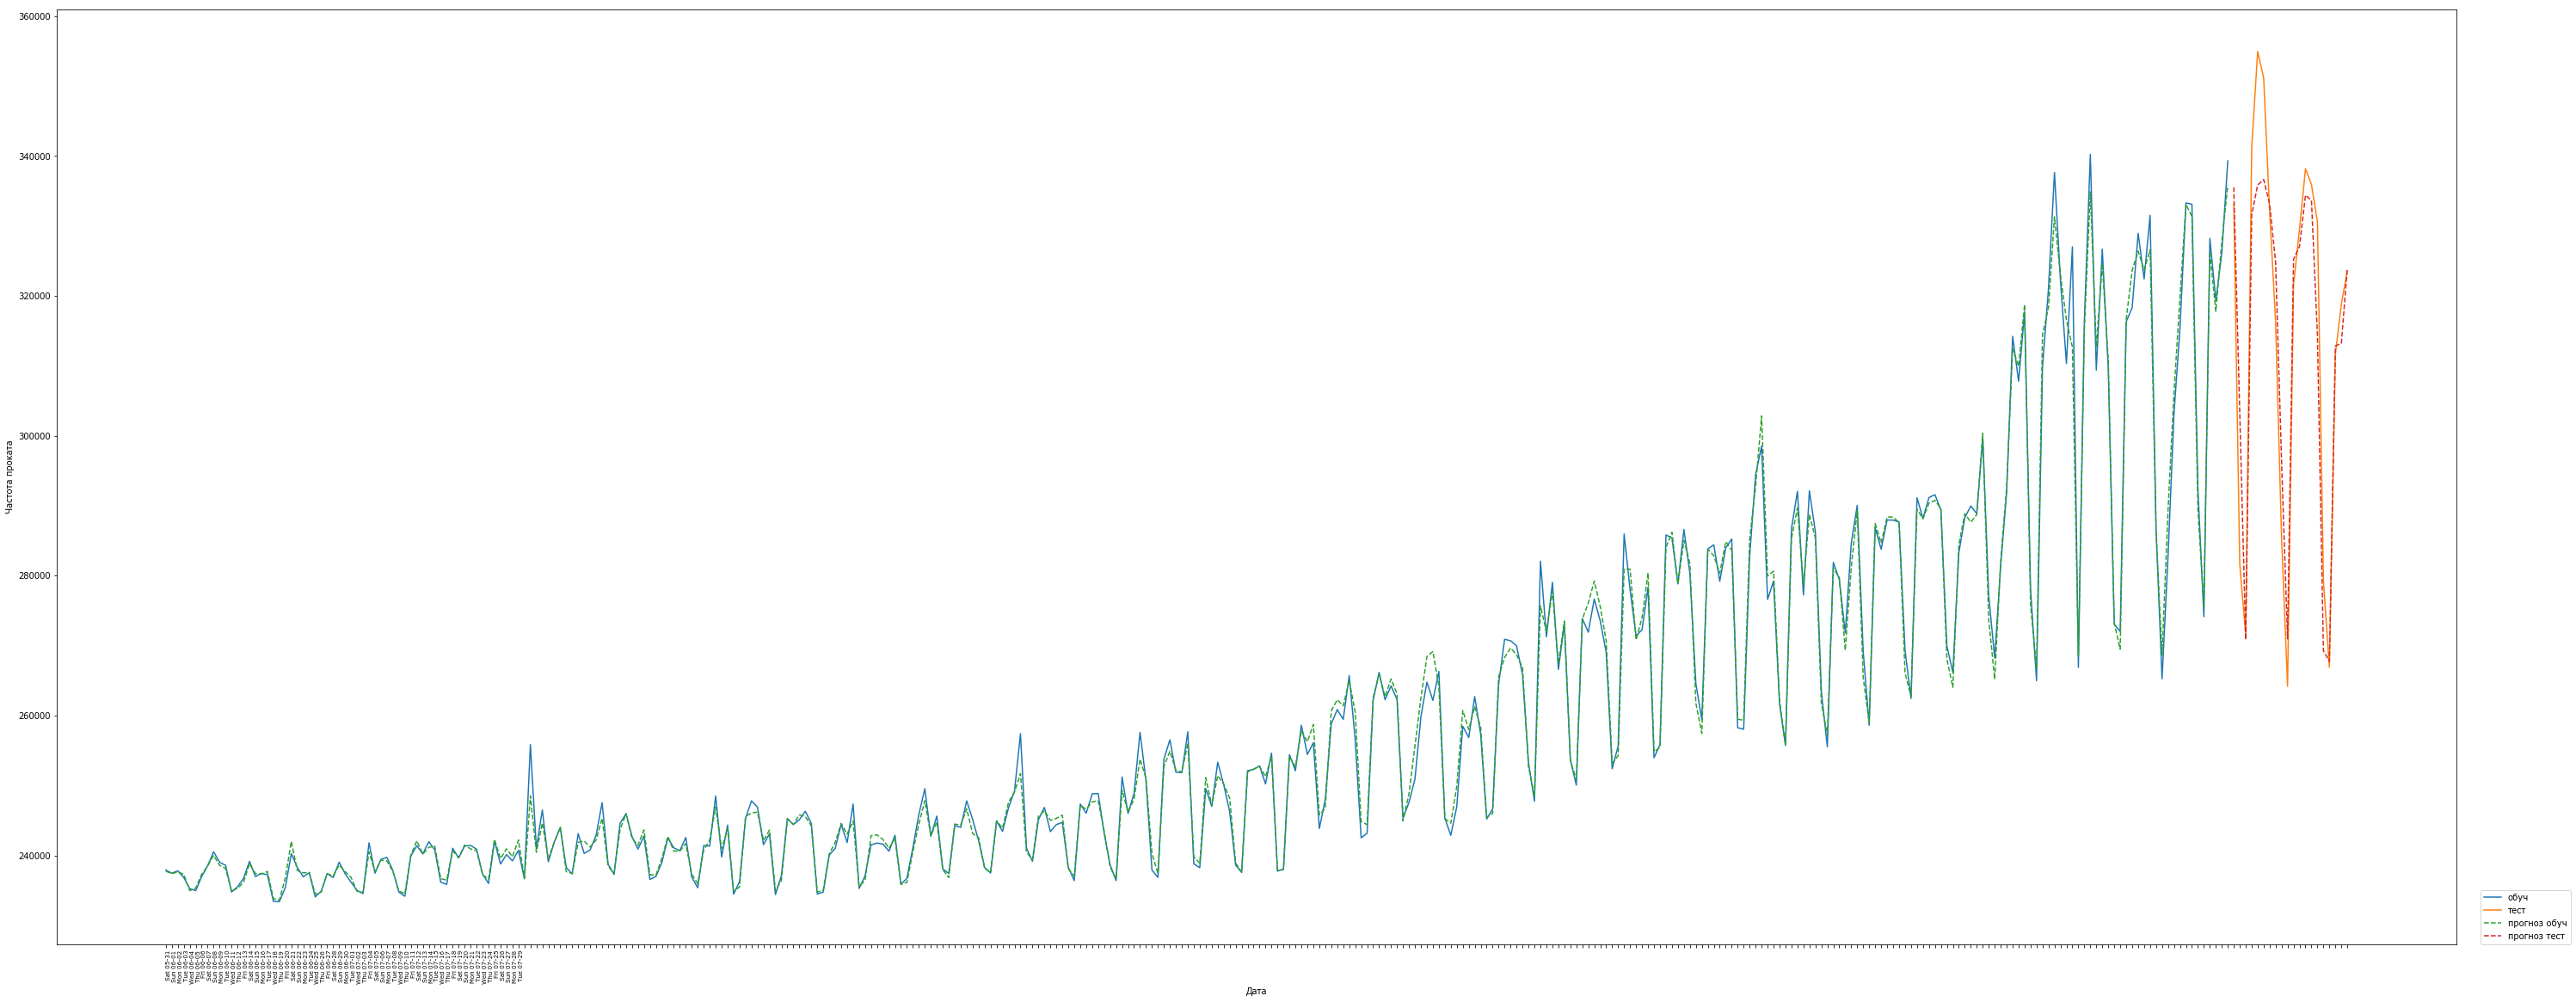

In [14]:
regressor = RandomForestRegressor(n_estimators=75, criterion = 'mae', random_state=0)
score = eval_on_features(X_day_week, y, regressor)